In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
commits = pd.io.sql.read_sql('''SELECT uid, timestamp 
                        FROM checker
                        WHERE uid LIKE "user_%"''', con, 
                        parse_dates=['timestamp'])

commits.head()

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370


In [4]:
commits['weekday'] = commits.timestamp.dt.dayofweek
commits['hour'] = commits.timestamp.dt.hour
commits['day'] = commits.timestamp.dt.day

In [5]:
commits.head()

,uid,timestamp,weekday,hour,day
0,user_4,2020-04-17 05:19:02.744528,4,5,17
1,user_4,2020-04-17 05:22:35.249331,4,5,17
2,user_4,2020-04-17 05:22:45.549397,4,5,17
3,user_4,2020-04-17 05:34:14.691200,4,5,17
4,user_4,2020-04-17 05:34:24.422370,4,5,17


In [6]:
commits['type'] = commits.weekday.apply(lambda x: 'working_day' if x < 5 else 'weekend')

In [7]:
commits.head()

,uid,timestamp,weekday,hour,day,type
0,user_4,2020-04-17 05:19:02.744528,4,5,17,working_day
1,user_4,2020-04-17 05:22:35.249331,4,5,17,working_day
2,user_4,2020-04-17 05:22:45.549397,4,5,17,working_day
3,user_4,2020-04-17 05:34:14.691200,4,5,17,working_day
4,user_4,2020-04-17 05:34:24.422370,4,5,17,working_day


In [8]:
df_group = commits.groupby(['type', 'day','hour']).count()
df_group = df_group.groupby(['type','hour'])['uid'].mean().reset_index()
df_group.head()

,type,hour,uid
0,weekend,0,2.0
1,weekend,1,6.0
2,weekend,3,1.0
3,weekend,5,2.0
4,weekend,7,4.0


In [9]:
df_pivot = pd.pivot(df_group, values='uid', index='hour', columns='type')

In [10]:
hour = pd.DataFrame([i for i in range(0,24)], columns = ['hour'])

In [11]:
result = hour.merge(df_pivot, how='left', on='hour').set_index('hour')

In [12]:
result.head()

,weekend,working_day
hour,,
0,2.0,3.0
1,6.0,NaN
2,NaN,NaN
3,1.0,2.0
4,NaN,NaN


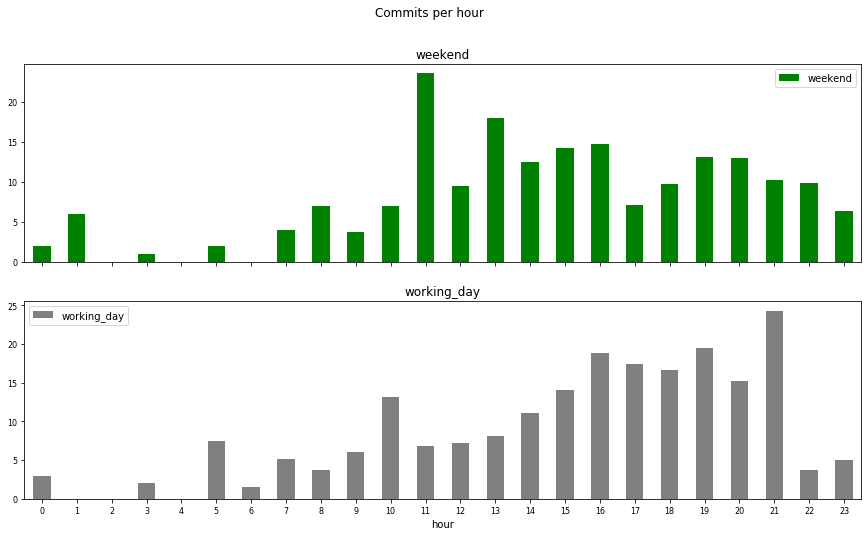

In [17]:
ax = result.plot(kind='bar', figsize=(15, 8), title='Commits per hour', rot=0, fontsize=8,
                 color=['g', 'grey'], sharex=True, subplots=True)

In [14]:
print('largest during working days at', result['working_day'].idxmax())

largest during working days at 21


In [15]:
print('largest during in weekend at', result['weekend'].idxmax())

largest during in weekend at 11


In [16]:
con.close()